In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2
import glob
import os

In [ ]:
pics, labels = [], []
for dir_path in glob.glob("/content/drive/MyDrive/MSIB/15 - Case Study Industri (Klasifikasi Gambar)/train/*"):
  for pic in glob.glob(os.path.join(dir_path,"*.jpeg")):  
    temp = cv2.imread(pic)
    temp = cv2.resize(temp, (70, 70)) 
    pics.append(temp)
    word_label = os.path.basename(os.path.dirname(pic))
    labels.append(word_label)

x_train = np.array(pics)
y_train = np.array(labels)

In [ ]:
pics, labels = [], []
for dir_path in glob.glob("/content/drive/MyDrive/MSIB/15 - Case Study Industri (Klasifikasi Gambar)/test/*"):
  for pic in glob.glob(os.path.join(dir_path,"*.jpeg")):  
    temp = cv2.imread(pic)
    temp = cv2.resize(temp, (70, 70)) 
    pics.append(temp)
    word_label = os.path.basename(os.path.dirname(pic))
    labels.append(word_label)

x_test = np.array(pics)
y_test = np.array(labels)

In [ ]:
print(x_test.shape)
print(x_train.shape)

(632, 70, 70, 3)
(5216, 70, 70, 3)


In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train_le = le.transform(y_train)
y_test_le = le.transform(y_test)

In [ ]:
le.inverse_transform(y_test_le),y_test

(array(['NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
        'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
        'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
        'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
        'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
        'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
        'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
        'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
        'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
        'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
        'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
        'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
        'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
        'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
        'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_ohe = to_categorical(y_train_le,3)
y_test_ohe = to_categorical(y_test_le,3)

In [ ]:
# PREPROCESSING
X_train = x_train.astype('float32') #set x_train data type as float32
X_test = x_test.astype('float32') #set x_test data type as float32
X_train /= 255 #change x_train value between 0 - 1
X_test /= 255 #change x_test value between 0 - 1

In [ ]:
# ARSITEKTUR
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential() #model = sequential 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(70,70,3))) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Conv2D(32, (3, 3), activation='relu')) #layer convolutional 2D
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling with stride (2,2)
model.add(Dropout(0.25)) #delete neuron randomly while training and remain 75%
model.add(Flatten()) #make layer flatten
model.add(Dense(128, activation='relu')) #fully connected layer
model.add(Dropout(0.5)) #delete neuron randomly and remain 50%
model.add(Dense(3, activation='softmax')) #softmax works

In [ ]:
# COMPILE
from tensorflow.keras.optimizers import SGD
epochs = 50
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint
filepath=r"/content/drive/MyDrive/MSIB/15 - Case Study Industri (Klasifikasi Gambar)/model3classes.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
#TRAINING
model.fit(X_train, y_train_ohe, validation_data=(X_test, y_test_ohe), epochs=epochs, batch_size=32, callbacks=[checkpoint])
scores = model.evaluate(X_test, y_test_ohe, verbose=0)

Epoch 1/50
163/163 [==============================] - 4s 8ms/step - loss: 0.9129 - accuracy: 0.5763 - val_loss: 0.8407 - val_accuracy: 0.6361
Epoch 2/50
163/163 [==============================] - 1s 7ms/step - loss: 0.6227 - accuracy: 0.7212 - val_loss: 0.8920 - val_accuracy: 0.6709
Epoch 3/50
163/163 [==============================] - 1s 7ms/step - loss: 0.5877 - accuracy: 0.7350 - val_loss: 1.0989 - val_accuracy: 0.6297
Epoch 4/50
163/163 [==============================] - 1s 7ms/step - loss: 0.5474 - accuracy: 0.7558 - val_loss: 0.8774 - val_accuracy: 0.7184
Epoch 5/50
163/163 [==============================] - 1s 7ms/step - loss: 0.5260 - accuracy: 0.7651 - val_loss: 1.0165 - val_accuracy: 0.7073
Epoch 6/50
163/163 [==============================] - 1s 7ms/step - loss: 0.5088 - accuracy: 0.7730 - val_loss: 1.0404 - val_accuracy: 0.6978
Epoch 7/50
163/163 [==============================] - 1s 7ms/step - loss: 0.4848 - accuracy: 0.7836 - val_loss: 1.1577 - val_accuracy: 0.6946
Epoch 

In [ ]:
# LOAD MODEL
from keras.models import load_model
testmodel = load_model("/content/drive/MyDrive/MSIB/15 - Case Study Industri (Klasifikasi Gambar)/model3classes.hdf5")

In [ ]:
#PREDIKSI
predict_x = testmodel.predict(X_test)
y_pred = classes_x=np.argmax(predict_x,axis=1)
y_hasil = le.inverse_transform(y_pred)
y_hasil

array(['NORMAL', 'PNEUMONIA VIRUS', 'PNEUMONIA BACTERIA',
       'PNEUMONIA BACTERIA', 'PNEUMONIA BACTERIA', 'PNEUMONIA BACTERIA',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'PNEUMONIA BACTERIA', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'PNEUMONIA BACTERIA', 'NORMAL', 'PNEUMONIA BACTERIA',
       'PNEUMONIA BACTERIA', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'PNEUMONIA BACTERIA', 'NORMAL',
       'PNEUMONIA BACTERIA', 'NORMAL', 'PNEUMONIA BACTERIA', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'PNEUMONIA BACTERIA', 'PNEUMONIA VIRUS',
       'PNEUMONIA BACTERIA', 'NORMAL', 'NORMAL', 'PNEUMONIA VIRUS',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'PNEUMONIA BACTERIA',
       'PNEUMONIA VIRUS', 'PNEUMONIA VIRUS', 'NORMAL', 'PNEUMONIA VIRUS',
       'PNEUMONIA VIRUS', 'PNEUMONIA BACTERIA', 'PNEUMONIA VIRUS',
       'NORMAL', 'NORMAL', 'PNEUMONIA VIRUS', 'NORMAL',
       'PNEUMONIA BACTER

In [ ]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(y_hasil, y_test))

                    precision    recall  f1-score   support

            NORMAL       0.55      0.93      0.69       143
PNEUMONIA BACTERIA       0.97      0.75      0.85       311
   PNEUMONIA VIRUS       0.72      0.60      0.66       178

          accuracy                           0.75       632
         macro avg       0.75      0.76      0.73       632
      weighted avg       0.80      0.75      0.76       632



accuracy score :  0.75


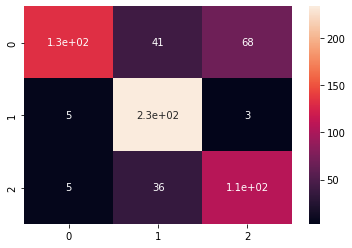

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print('accuracy score : ',accuracy_score(y_test, y_hasil))
labels =['NORMAL','PNEUMONIA BACTERIA','PNEUMONIA VIRUS']
cm = confusion_matrix(y_test, y_hasil, labels=labels)
sn.heatmap(cm, annot=True)